  
##Assignment 2.2.1 - Classification

In this file, we work on the classification using Multilayer Perceptron (MLP).

Specifically, we will conduct prediction on Ionosphere and Diabetes datasets.
The method is implemented with a ``python`` package named ``scikit-learn``.


In [2]:
# Please first load your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Please go to the folder with all assignment files
# Please change the following path to your own path
!cd /content/drive/MyDrive/

In [4]:
!ls

drive  sample_data


In [5]:
!pip install openml

# Classification with MLP

In [6]:
import numpy as np
import openml
import math

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Ionosphere dataset
We first load the dataset, you can check the index of datasets from [here](https://www.openml.org/search?type=data&sort=runs&status=active).

In [25]:
# Load the dataset
dataset = openml.datasets.get_dataset(59)
# Turn data into numpy array
X, _, _, _ = dataset.get_data(dataset_format="array")
# Check the data size and dimension
print(X.shape)
# Separate input and targets
y = X[:,-1]
X = X[:,:-1]

# Partition dataset into training, validation and test sets
X_sub, X_test, y_sub, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_sub, y_sub, test_size=0.2)

(351, 35)


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
<ipython-input-25-afa493cf260a>:4: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, _, _, _ = dataset.get_data(dataset_format="array")


You can visualize the potential relationships or correlations amongst the different data attributes by leveraging a pair-wise correlation matrix and depict it as a heatmap.

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


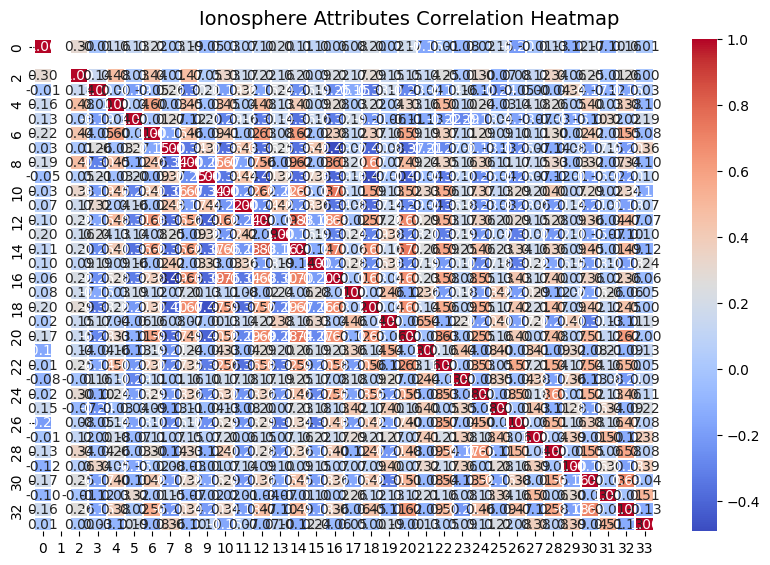

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 6))
corr = np.corrcoef(X.transpose())
hm = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Ionosphere Attributes Correlation Heatmap', fontsize=14)

In [9]:
corr.shape

(34, 34)

Build a MLP and train it on the training set.
Note that we can use ``MLPClassifier`` from ``sklearn`` to build and train the network.

A detailed instruction of the ``MLPClassifier`` function can be found in [this instruction page](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

You can tune on the number of layers, number of neurons in each layer, max_iter, optimizer, etc., to obtain better performance.
Please tune the hyper-parameters based on the accuracy on the validation set.

Once you decide your best hyper-parameters setting, you can evaluate the model on the test set.

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Define hyperparameters to iterate over
hidden_layer_sizes_list = [(50,), (50, 50), (50, 50, 50)]
activation_list = ['logistic', 'tanh', 'relu']
solver_list = ['lbfgs', 'sgd', 'adam'] # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
max_iter_list = [2000, 6000, 8000]

results = []

for hidden_layer_sizes in hidden_layer_sizes_list:
    for activation in activation_list:
        for solver in solver_list:
            for max_iter in max_iter_list:
                clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter)
                clf.fit(X_train, y_train)
                y_val_pred = clf.predict(X_val)
                acc_val = accuracy_score(y_val, y_val_pred)
                y_test_pred = clf.predict(X_test)
                acc_test = accuracy_score(y_test, y_test_pred)
                if acc_val > 0.92 and acc_test > 0.91:
                  results.append([hidden_layer_sizes, activation, solver, max_iter, acc_val, acc_test])

# Print results in markdown-styled table
headers = ["Hidden Layer Sizes", "Activation", "Solver", "Max Iter", "Validation Accuracy", "Test Accuracy"]
print(tabulate(results, headers=headers, tablefmt="pipe"))

| Hidden Layer Sizes   | Activation   | Solver   |   Max Iter |   Validation Accuracy |   Test Accuracy |
|:---------------------|:-------------|:---------|-----------:|----------------------:|----------------:|
| (50, 50)             | relu         | sgd      |       6000 |              0.928571 |        0.929577 |
| (50, 50)             | relu         | sgd      |       8000 |              0.928571 |        0.915493 |
| (50, 50)             | relu         | adam     |       6000 |              0.928571 |        0.915493 |
| (50, 50)             | relu         | adam     |       8000 |              0.928571 |        0.915493 |
| (50, 50, 50)         | relu         | sgd      |       8000 |              0.946429 |        0.929577 |


Acc on the test set is 0.958


<Axes: >

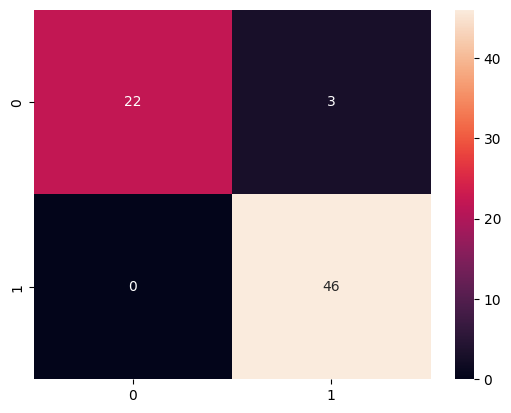

In [12]:
# You can also plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True)

## Diabetes dataset
We first load the dataset, you can check the index of datasets from [here](https://www.openml.org/search?type=data&sort=runs&status=active).

In [24]:
# Load the dataset
dataset = openml.datasets.get_dataset(42608)
# Turn data into numpy array
X, _, _, _ = dataset.get_data(dataset_format="array")
# Check the data size and dimension
print(X.shape)
# Separate input and targets
y = X[:,-1]
X = X[:,:-1]

# Partition dataset into training, validation and test sets
X_sub, X_test, y_sub, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_sub, y_sub, test_size=0.2)

(768, 9)


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
<ipython-input-24-29abdec525a9>:4: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, _, _, _ = dataset.get_data(dataset_format="array")


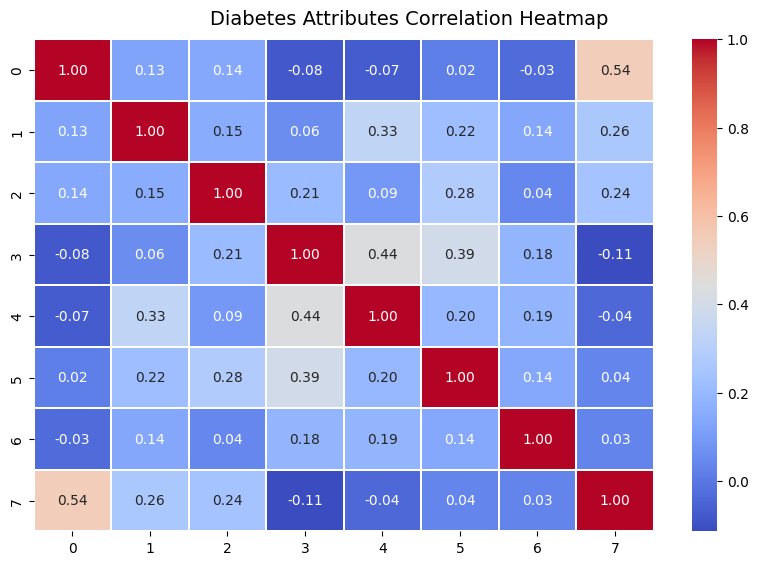

In [17]:
# Visualize the correlation matrix of the dataset
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 6))
corr = np.corrcoef(X.transpose())
hm = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Diabetes Attributes Correlation Heatmap', fontsize=14)

In [22]:
# Define hyperparameters to iterate over
hidden_layer_sizes_list = [(50,), (50, 50), (50, 50, 50)]
activation_list = ['logistic', 'tanh', 'relu']
solver_list = ['lbfgs', 'sgd', 'adam'] # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
max_iter_list = [2000, 6000, 8000]
results = []

for hidden_layer_sizes in hidden_layer_sizes_list:
    for activation in activation_list:
        for solver in solver_list:
            for max_iter in max_iter_list:
                clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter)
                clf.fit(X_train, y_train)
                y_val_pred = clf.predict(X_val)
                acc_val = accuracy_score(y_val, y_val_pred)
                y_test_pred = clf.predict(X_test)
                acc_test = accuracy_score(y_test, y_test_pred)
                if acc_val > 0.7 and acc_test > 0.7:
                  results.append([hidden_layer_sizes, activation, solver, max_iter, acc_val, acc_test])

# Print results in markdown-styled table
headers = ["Hidden Layer Sizes", "Activation", "Solver", "Max Iter", "Validation Accuracy", "Test Accuracy"]
print(tabulate(results, headers=headers, tablefmt="pipe"))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

| Hidden Layer Sizes   | Activation   | Solver   |   Max Iter |   Validation Accuracy |   Test Accuracy |
|:---------------------|:-------------|:---------|-----------:|----------------------:|----------------:|
| (50,)                | logistic     | adam     |       6000 |              0.772358 |        0.727273 |
| (50,)                | logistic     | adam     |       8000 |              0.747967 |        0.714286 |
| (50,)                | tanh         | sgd      |       8000 |              0.731707 |        0.707792 |
| (50, 50)             | logistic     | adam     |       2000 |              0.796748 |        0.74026  |
| (50, 50)             | logistic     | adam     |       8000 |              0.788618 |        0.733766 |
| (50, 50)             | relu         | lbfgs    |       8000 |              0.715447 |        0.707792 |
| (50, 50)             | relu         | adam     |       2000 |              0.747967 |        0.701299 |
| (50, 50, 50)         | logistic     | adam  

In [19]:
# Evaluatte the MLP on the validation set
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

print("Acc on the test set is {:.3f}".format(acc_test))

Acc on the test set is 0.623
